In [28]:
from qiskit import QuantumCircuit
import sys
sys.path.append("..")
from src.utils.riswap_gates.riswap import RiSwapGate
qc = QuantumCircuit(3)
# qc.u(0, 0, 0,0)
# qc.u(0, 0, 0,1)
# qc.append(RiSwapGate(0.5), [0,1])
# qc.u(0, 0, 0,0)
# qc.u(0, 0, 0,1)
# qc.append(RiSwapGate(0.5), [0,1])
# qc.u(0, 0, 0,0)
# qc.u(0, 0, 0,1)
qc.cswap(2,0,1)

qc.cswap(1,0,2)
qc.swap(0,1)
qc.swap(0,2)

print(qc.draw(output='latex_source', with_layout=False))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \qswap & \qswap & \qswap & \qswap & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qswap \qwx[-1] & \ctrl{1} & \qswap \qwx[-1] & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \ctrl{-1} & \qswap \qwx[-2] & \qw & \qswap \qwx[-2] & \qw & \qw\\
\\ }}
\end{document}


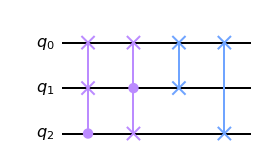

In [25]:
qc.draw(output='mpl')

In [26]:
from qiskit.quantum_info import Operator
Operator(qc).data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{{$\mathrm{global\,phase:\,} \mathrm{\frac{\pi}{4}}$}
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \multigate{2}{\mathrm{R_{ZX}}\,(\mathrm{\frac{\pi}{2}})}_<<<{0} & \gate{\mathrm{S^\dagger}} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \ghost{\mathrm{R_{ZX}}\,(\mathrm{\frac{\pi}{2}})} & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \ghost{\mathrm{R_{ZX}}\,(\mathrm{\frac{\pi}{2}})}_<<<{1} & \gate{\mathrm{\sqrt{X}^\dagger}} & \qw & \qw\\
\\ }}
\end{document}


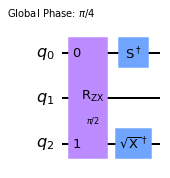

In [3]:
from qiskit import QuantumCircuit, QuantumRegister
from numpy import pi as pi
from qiskit.circuit.library.standard_gates import *
q = QuantumRegister(3, "q")
cx_to_zx90 = QuantumCircuit(3, global_phase=pi / 4)
for inst, qargs, cargs in [
    (RZXGate(pi / 2), [q[0], q[2]], []),
    (SdgGate(), [q[0]], []),
    (SXdgGate(), [q[2]], []),
]:
    cx_to_zx90.append(inst, qargs, cargs)
print(cx_to_zx90.draw(output='latex_source'))
cx_to_zx90.draw(output='mpl')

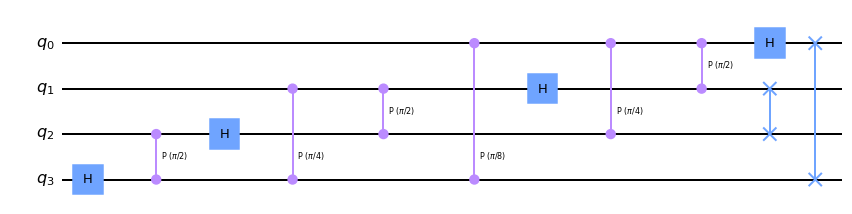

In [12]:
from qiskit.circuit.library.basis_change import QFT
qc = QFT(4)
qc.decompose().draw(output='mpl')
#print(qc.decompose().draw(output='latex_source'))

In [17]:
import numpy as np
print(np.array(CPhaseGate(pi/2, 0, 1)))

[[1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17+1.j]]
